In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

dataset = pd.read_csv('/Users/kathiateran/Documents/Machine Learning/A1. FINAL/datasets/QCM6.csv', sep=',')
dataset

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1,Class
0,-11.82,-13.29,-19.32,-26.28,-38.14,-50.09,-59.78,-75.04,-85.63,-104.66,0
1,-11.54,-14.18,-25.35,-32.75,-48.77,-60.08,-75.41,-89.72,-104.25,-121.90,0
2,-12.45,-15.81,-33.33,-40.64,-61.50,-72.12,-91.75,-104.67,-124.21,-139.76,0
3,-14.67,-18.49,-40.56,-47.67,-72.11,-82.19,-106.26,-118.26,-141.95,-155.84,0
4,-18.07,-19.74,-47.08,-53.50,-81.15,-89.81,-117.91,-128.10,-156.66,-168.72,0
5,-98.63,-97.92,-137.15,-131.93,-191.17,-180.52,-260.06,-240.69,-352.22,-321.20,1
6,-96.62,-96.50,-136.86,-131.75,-192.76,-182.30,-264.07,-245.29,-357.64,-327.04,1
7,-95.58,-95.61,-137.43,-132.20,-193.50,-183.30,-266.77,-248.06,-359.32,-329.25,1
8,-94.48,-94.49,-136.49,-132.39,-193.90,-184.20,-267.82,-249.31,-361.72,-331.38,1
9,-94.04,-93.29,-136.13,-130.11,-194.96,-183.40,-267.72,-249.56,-360.72,-330.82,1


In [2]:
X = dataset.iloc[:, 0:10].values
y = dataset.iloc[:, 10].values

In [3]:
# Splitting the dataset:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from fcmeans import FCM

n_samples = 100
fcm = FCM(n_clusters=5)

fcm.fit(X)

In [5]:
pred_train_fcm = fcm.predict(X_train)
pred_test_fcm = fcm.predict(X_test)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_train, pred_train_fcm)))

print('Prediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_fcm)))

print('Confusion Matrix')
print(metrics.confusion_matrix(y_test, pred_test_fcm))


Prediction accuracy for the training dataset
20.00%

Prediction accuracy for the test dataset
20.00%

Confusion Matrix
[[0 1 0 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 1]]


In [6]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test, pred_test_fcm)

True_Positive = conf_mat[0][0]
False_Positive = conf_mat[0][1]
False_Negative = conf_mat[1][0]
True_Negative = conf_mat[1][1]

print("True Positive: ", True_Positive)
print("False Positive: ", False_Positive)
print("False Negative: ", False_Negative)
print("True Negative: ", True_Negative)

True Positive:  0
False Positive:  1
False Negative:  0
True Negative:  0


In [7]:
from sklearn.metrics import classification_report
print("Classification Report:\n\n",classification_report(y_test,pred_test_fcm))

Classification Report:

               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1

    accuracy                           0.20         5
   macro avg       0.20      0.20      0.20         5
weighted avg       0.20      0.20      0.20         5



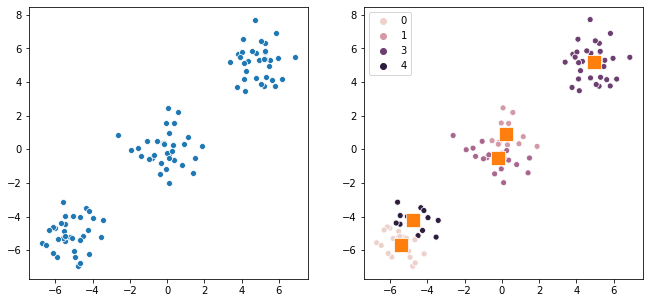

In [8]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter

n_samples = 100
n_bins = 5 
centers = [(-5, -5), (0, 0), (5, 5)]

X,_ = make_blobs(n_samples=n_samples, n_features=5, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42) 

# fit the fuzzy-c-means
fcm = FCM(n_clusters=5)
fcm.fit(X)

# outputs
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)

# plot result
#%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(11,5))
scatter(X[:,0], X[:,1], ax=axes[0])
scatter(X[:,0], X[:,1], ax=axes[1], hue=fcm_labels)
scatter(fcm_centers[:,0], fcm_centers[:,1], ax=axes[1],marker="s",s=200)
plt.show()